## import necessary libraries

Import `pandas as pd`, `numpy as np` and `seaborn as sns`
Furthermore, import `Pipeline` from `sklearn.pipeline`, `RandomForestClassifier` from `sklearn.ensemble` and `train_test_split` from `sklearn.model_selection`.

Import `accuracy_score`, `f1_score`, `precision_score`, `hamming_loss` and `confusion_matrix` from `sklearn.metrics`. 

Finally, import `CountVectorizer` and `TfidfTransformer` from `sklearn.feature_extraction.text` and `pplot_cm` from `conf_matrix` (this script should be in your local repo) and `matplotlib.pyplot` as `plt`.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, hamming_loss, confusion_matrix
import joblib

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from conf_matrix import pplot_cm
import seaborn as sns

import pandas as pd
import csv
import nltk 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

## load data

Load your previously saved csv dataframe using pandas' `read_csv()`.

In [ ]:
data = pd.read_csv("training_data_tweets.csv")

In [ ]:
data

,sentiment,text
0,neutral,tainted talents ateliertagebuch wir sind nicht...
1,neutral,aber wenigstens kommt supernatural heute mal ...
2,neutral,darlehen angebot fr schufafreie darlehen gnsti...
3,neutral,anruf erwnscht hardcore teeny vicky carrera ha...
4,neutral,na wo sind frankens heimliche talente die er...
...,...,...
6753,neutral,wirtschaftsminister mitterlehner zeichnet cafc...
6754,neutral,clqualifikation zenit mit kantersieg austria z...
6755,negative,okay machse einfach eu
6756,neutral,ffentliche pfeifturmbegehung fhrung um uhr alt...


## plot label frequencies

Set the seaborn color palette to "deep" using `sns.set()`.
Then, plot the label frequencies using `sns.countplot()` on the column "sentiment" (or what ever you have called it).

/opt/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


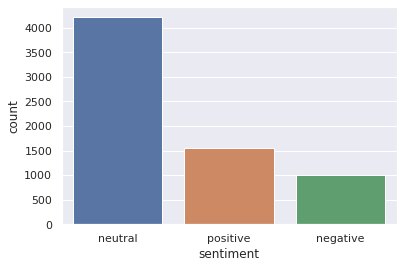

In [ ]:
sns.set(palette="deep")
sns.countplot(data.sentiment)
plt.show()

## load stopwords

Use stop words to remove less-meaningful words. The logic of removing stop words has to do with the fact that these words don't carry a lot of meaning, and they appear a lot in most text. We have provided you with a list of common German stopwords ('data/stopwords_german.txt'). Import the packages `io` and `unidecode` first, then use `io.open()` and `readlines()` to save the words contained in the .txt file to a list. 

Call the python string function `strip()` to remove newline characters (`\n`) and unidecode's `unidecode()` on every element in the resulting list.

In [ ]:
import io
!pip install unidecode
import unidecode

with io.open('data/stopwords_german.txt', 'r') as file:
    wordlist = file.readlines()


wordlist_n  = [word.rstrip("\n") for word in wordlist]
print(wordlist)
print(wordlist_n)

# you can also add your own stopwords in this step using append()
...

stopwords = wordlist_n

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
['a\n', 'ab\n', 'aber\n', 'ach\n', 'acht\n', 'achte\n', 'achten\n', 'achter\n', 'achtes\n', 'ag\n', 'alle\n', 'allein\n', 'allem\n', 'allen\n', 'aller\n', 'allerdings\n', 'alles\n', 'allgemeinen\n', 'als\n', 'also\n', 'am\n', 'an\n', 'ander\n', 'andere\n', 'anderem\n', 'anderen\n', 'anderer\n', 'anderes\n', 'anderm\n', 'andern\n', 'anderr\n', 'anders\n', 'au\n', 'auch\n', 'auf\n', 'aus\n', 'ausser\n', 'ausserdem\n', 'außer\n', 'außerdem\n', 'b\n', 'bald\n', 'bei\n', 'beide\n', 'beiden\n', 'beim\n', 'beispiel\n', 'bekannt\n', 'bereits\n', 'besonders\n', 'besser\n', 'besten\n', 'bin\n', 'bis\n', 'bisher\n', 'bist\n', 'c\n', 'd\n', 'd.h\n', 'da\n', 'dabei\n', 'dadurch\n', 'dafür\n', 'dagegen\n', 'daher\n', 'dahin\n', 'dahinter\n', 'damals\n', 'damit\n', 'danach\n', 'daneben\n', 'dank\n', 'dann\n', 'daran\n', 'darauf\n', 'daraus\n', 'darf\n', 'darfst\n', 'darin\n', 'darum\n', 'darunter\n', 'd

In [ ]:
stopwords

['a',
 'ab',
 'aber',
 'ach',
 'acht',
 'achte',
 'achten',
 'achter',
 'achtes',
 'ag',
 'alle',
 'allein',
 'allem',
 'allen',
 'aller',
 'allerdings',
 'alles',
 'allgemeinen',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'au',
 'auch',
 'auf',
 'aus',
 'ausser',
 'ausserdem',
 'außer',
 'außerdem',
 'b',
 'bald',
 'bei',
 'beide',
 'beiden',
 'beim',
 'beispiel',
 'bekannt',
 'bereits',
 'besonders',
 'besser',
 'besten',
 'bin',
 'bis',
 'bisher',
 'bist',
 'c',
 'd',
 'd.h',
 'da',
 'dabei',
 'dadurch',
 'dafür',
 'dagegen',
 'daher',
 'dahin',
 'dahinter',
 'damals',
 'damit',
 'danach',
 'daneben',
 'dank',
 'dann',
 'daran',
 'darauf',
 'daraus',
 'darf',
 'darfst',
 'darin',
 'darum',
 'darunter',
 'darüber',
 'das',
 'dasein',
 'daselbst',
 'dass',
 'dasselbe',
 'davon',
 'davor',
 'dazu',
 'dazwischen',
 'daß',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 '

## split data for training

To train and evaluate the model, we split the data into a training set and a test set using `train_test_split()`, the arguments  being the text column, the label/sentiment column, a test set size (`test_size=0.1` for 10%, `test_size=0.3` for 30%, etc.) and a integer of your choice as random_state.

You can then call `.shape` on the resulting sets to see their dimensions.

In [ ]:
from sklearn.model_selection import train_test_split
y = data["sentiment"]
X = data["text"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 31)

#!pip install imbalanced-learn
#from imblearn.over_sampling import RandomOverSampler
#oversample = RandomOverSampler(sampling_strategy='minority')
#X_train, y_train = oversample.fit_resample(np.ravel(X_train).reshape(-1,1), np.ravel(y_train))

In [ ]:
X_train

3354    jack wird sich einfach zwangverheiraten amp de...
1810    mir fehlen noch bis zur genehmigung einmal mll...
3811    verbindliche altersbeschrnkung csu fordert por...
3873     oh das erffnet ungeahnte mglichkeiten des inz...
3079                                klischee erfllt  btk 
                              ...                        
3735                      du hast interessante vorlieben 
6754    clqualifikation zenit mit kantersieg austria z...
2942     rechte parteien kndigen demomarathon an  mahe...
2064                         der kennt sich da super aus 
4818                    verfickte scheie solche spasten  
Name: text, Length: 6082, dtype: object

## set up ML pipeline

Instantiate a pipeline by adding 3 steps: a `CountVectorizer()` `'vect'`, a `TfidfTransformer()` `'tfidf'` and a `RandomForestClassifier()` `'rf'`.

The [Countvectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) helps us to create numerical values from text by counting the inherent tokens. Pass `analyzer='word'`, `strip_accents='unicode'` and `lowercase=True`. Pass your list of stopwords as `stop_words`.

The arguments for the `TfidfTransformer` are `use_idf=True` and `smooth_idf=True`.

Fit your pipeline to the training data by calling `fit()` on the pipeline object and passing the training texts and training labels.

In [ ]:
pipeline = Pipeline([
    (
        'vect', CountVectorizer(analyzer='word', strip_accents='unicode', lowercase=True, stop_words=stopwords)

    ),
    (
        'tfidf', TfidfTransformer(use_idf=True, smooth_idf=True)

    ),
    (
        'rf', RandomForestClassifier()

    )
])

In [ ]:
X_test.shape

(676,)

In [ ]:
X_train

3354    jack wird sich einfach zwangverheiraten amp de...
1810    mir fehlen noch bis zur genehmigung einmal mll...
3811    verbindliche altersbeschrnkung csu fordert por...
3873     oh das erffnet ungeahnte mglichkeiten des inz...
3079                                klischee erfllt  btk 
                              ...                        
3735                      du hast interessante vorlieben 
6754    clqualifikation zenit mit kantersieg austria z...
2942     rechte parteien kndigen demomarathon an  mahe...
2064                         der kennt sich da super aus 
4818                    verfickte scheie solche spasten  
Name: text, Length: 6082, dtype: object

In [ ]:
y_train

3354     neutral
1810    positive
3811     neutral
3873    negative
3079     neutral
          ...   
3735    positive
6754     neutral
2942     neutral
2064     neutral
4818    negative
Name: sentiment, Length: 6082, dtype: object

In [ ]:
# fit pipeline to training data
pipeline.fit(np.ravel(X_train), pd.Series(y_train))

/opt/venv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['dafur', 'daruber', 'demgegenuber', 'demgemass', 'demgemaß', 'durfen', 'durft', 'fruher', 'funf', 'funfte', 'funften', 'funfter', 'funftes', 'fur', 'gegenuber', 'konnen', 'konnt', 'mogen', 'moglich', 'mogt', 'mussen', 'naturlich', 'spater', 'uber', 'uberhaupt', 'ubrigens', 'wahr', 'wahrend', 'wahrenddem', 'wahrenddessen', 'ware', 'zunachst', 'zuruck', 'zwolf'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['a', 'ab', 'aber', 'ach', 'acht',
                                             'achte', 'achten', 'achter',
                                             'achtes', 'ag', 'alle', 'allein',
                                             'allem', 'allen', 'aller',
                                             'allerdings', 'alles',
                                             'allgemeinen', 'als', 'also', 'am',
                                             'an', 'ander', 'andere', 'anderem',
                                             'anderen', 'anderer', 'anderes',
                                             'anderm', 'andern', ...],
                                 strip_accents='unicode')),
                ('tfidf', TfidfTransformer()),
                ('rf', RandomForestClassifier())])

## score model

We have provided you with a function to score your model using the test texts and labels. In case of encoding issues calling `.values.astype('U')` on the texts before passing them to your pipeline might help.

In [ ]:
def score_model(true, pred):
    print('Accuracy:', accuracy_score(true, pred))
    print('F1:', f1_score(true, pred, average='weighted'))
    print('Precision:', precision_score(true, pred, average='weighted'))
    print('Hamming loss', hamming_loss(true, pred))

## plot confusion matrix

To quickly plot a confusion matrix, use the provided function pplot_cm and pass the same arguments as with `score_model()`.

Accuracy: 0.995396251233147
F1: 0.9953893352731933
Precision: 0.9954153252515614
Hamming loss 0.0046037487668530086


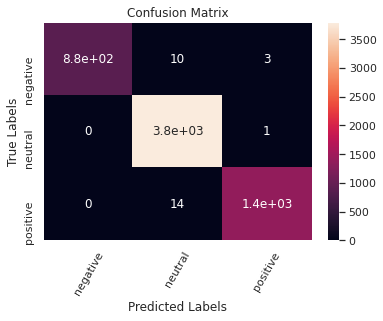

Accuracy: 0.995396251233147
F1: 0.9953893352731933
Precision: 0.9954153252515614
Hamming loss 0.0046037487668530086


In [ ]:
# plot a confucion matrix to visualize true positives, true negatives, ...
# https://en.wikipedia.org/wiki/Confusion_matrix
pred = pipeline.predict(X_test)
score_model(y_test, pred)
pplot_cm(y_test, pred)

## manual tests

Pass the example texts from the repo description to `pipeline.predict()` and play around with new texts to get a feeling for how your model determines a sentiment.

Accuracy: 1.0
F1: 1.0
Precision: 1.0
Hamming loss 0.0


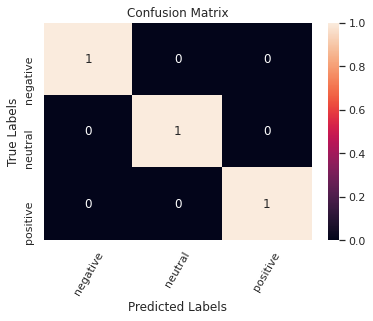

Accuracy: 1.0
F1: 1.0
Precision: 1.0
Hamming loss 0.0


In [ ]:
# use your pipeline to create class predictions for the three example texts given in the readme
datav = pd.read_csv("examples_data_tweets.csv")
y_val = datav["sentiment"]
X_val = datav["text"]
predv = pipeline.predict(X_val)
score_model(y_val, predv)
pplot_cm(y_val, predv)

In [ ]:
datav

,sentiment,text
0,positive,bin rundum begeistert insbesondere die musikw...
1,negative,startet leider nicht mehr ich hatte den echo ...
2,neutral,gut aber im alltag noch nicht ausgereift ama...
